In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:2].values
Y=dataset.iloc[:,2:].values

In [ ]:
# very little data so won't split into training and testing sets

'''from sklearn.linear_model import 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)'''

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_Y=StandardScaler()
X=sc_X.fit_transform(X)
Y=sc_Y.fit_transform(Y)

C:\Users\Jeffrey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
# fit linear regression to dataset - for comparison

from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,Y)

C:\Users\Jeffrey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [7]:
Y_pred= sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]])))) 

# need to transform X to apply the regressor - need to convert array

# need to inverse the transform to see the actual value (untransformed)

In [8]:
Y_pred

array([ 170370.0204065])

<function matplotlib.pyplot.show>

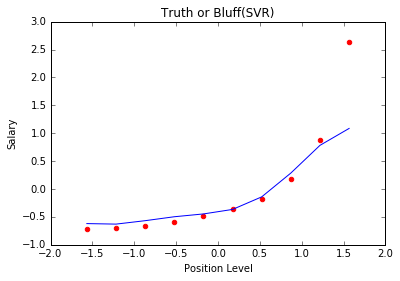

In [9]:
# visualize the linear regression results
plt.scatter(X,Y,color='red') #real data
plt.plot(X,regressor.predict(X),color='blue') # predicted solaries as a line
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show

# top red point is an 'outlier'